   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


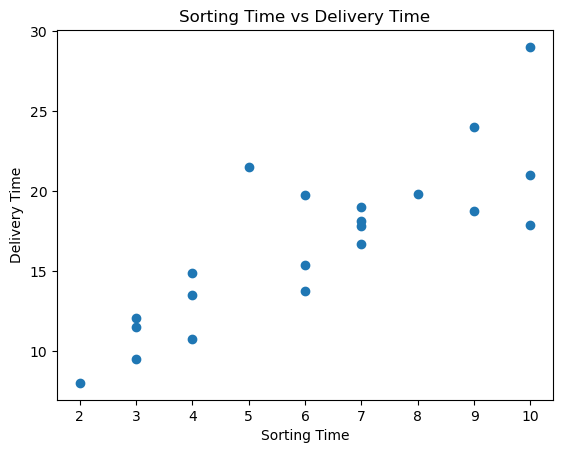

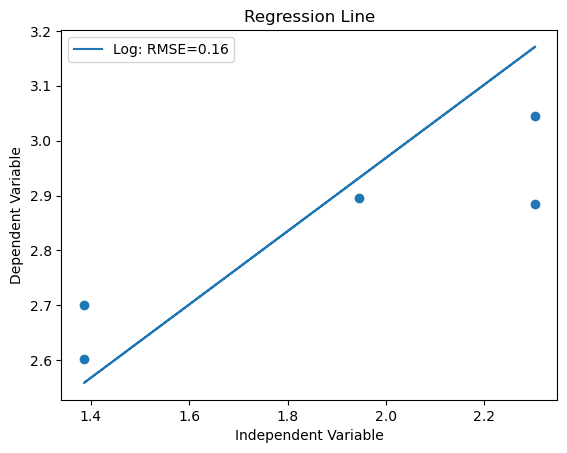

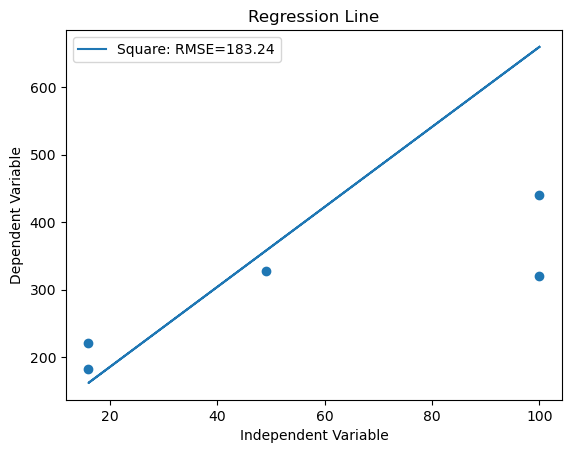

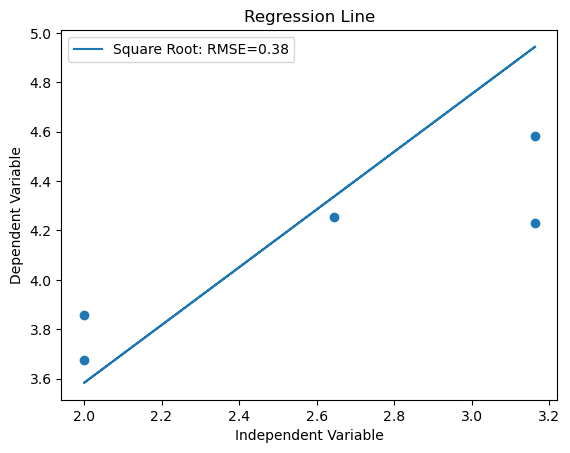

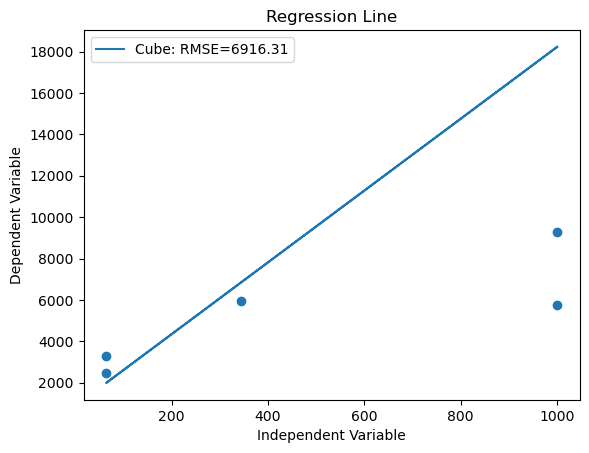

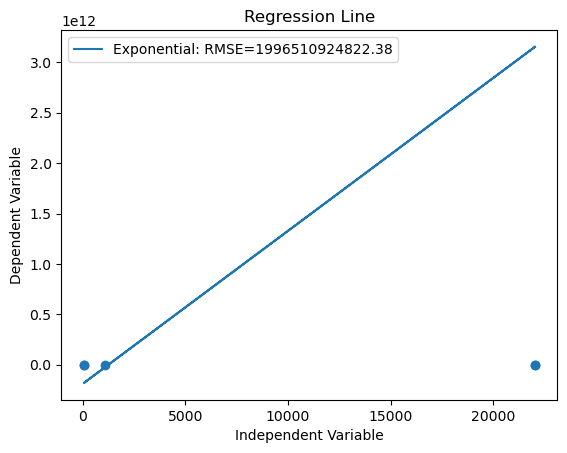

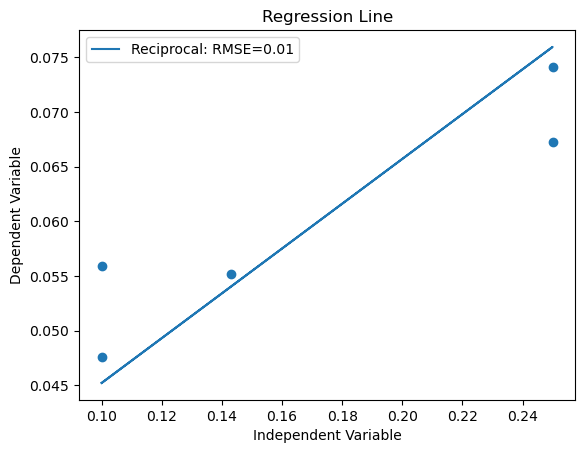

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\simple linear regression\delivery_time.csv
df = pd.read_csv(file_path)

print(df.head())

plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.title('Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


X_orig = df[['Sorting Time']]
y_orig = df['Delivery Time']


transformations = {
    'Log': (np.log(X_orig), np.log(y_orig)),
    'Square': (np.square(X_orig), np.square(y_orig)),
    'Square Root': (np.sqrt(X_orig), np.sqrt(y_orig)),
    'Cube': (np.power(X_orig, 3), np.power(y_orig, 3)),  
    'Exponential': (np.exp(X_orig), np.exp(y_orig)),  
    'Reciprocal': (1 / X_orig, 1 / y_orig)  
}


for label, (X_transformed, y_transformed) in transformations.items():
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, label=f'{label}: RMSE={rmse:.2f}')
    plt.title('Regression Line')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.legend()
    plt.show()
